In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import randomized search
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [27]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [28]:
# data = pd.read_csv("Prophet data.csv")

In [29]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [30]:
data = data.reset_index()

In [31]:
data.head()

,index,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [32]:
data.columns = ['ds', 'y']

In [33]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [34]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [35]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


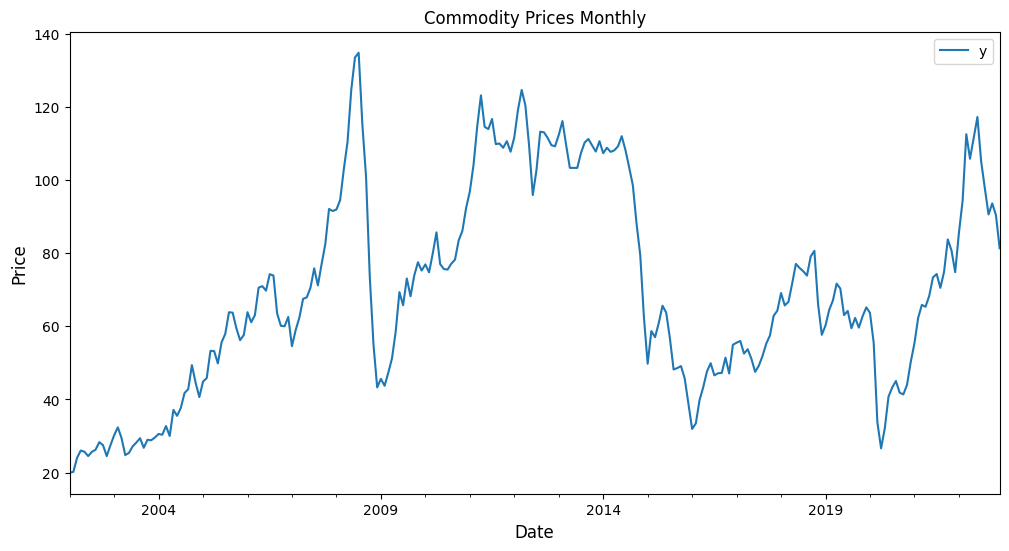

In [36]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [37]:
# set training and testing start dates
train = data[['ds', 'y']].copy()
test = data[['ds', 'y']].copy()

In [38]:
train = train[train['ds'] < '2019-01-01']
test = test[test['ds'] >= '2019-01-01']

train.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [39]:
test.head()

,ds,y
204,2019-01-01,60.23
205,2019-02-01,64.50
206,2019-03-01,67.05
207,2019-04-01,71.66
208,2019-05-01,70.30


In [40]:
# train = pd.read_csv('train_data.csv')
# test = pd.read_csv('test_data.csv')

In [41]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [42]:
# from sklearn.base import BaseEstimator
# # perform hyperparameter tuning with randomized search
# # define the parameter grid
# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'n_changepoints': [10, 20, 30, 40, 50],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'daily_seasonality': [True, False],
#     'weekly_seasonality': [True, False],
#     'yearly_seasonality': [True, False]
# }

# # initialize the model
# class ProphetEstimator(BaseEstimator):
#     def __init__(self, **kwargs):
#         self.model = Prophet(**kwargs)
    
#     def fit(self, X, y=None):
#         self.model.fit(X, y)
#         return self
    
#     def predict(self, X):
#         return self.model.predict(X)
# # {'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10, 'holidays_prior_scale': 0.1, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1}

# # initialize the model
# model = ProphetEstimator(seasonality_prior_scale=0.1, seasonality_mode='multiplicative', n_changepoints=10, holidays_prior_scale=0.1, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=0.1)

# # perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(train)


In [43]:

# Initialize the Prophet model
model = Prophet()

In [44]:
# Fit the model with your training data
model.fit(train)

00:29:26 - cmdstanpy - INFO - Chain [1] start processing


00:29:26 - cmdstanpy - INFO - Chain [1] done processing


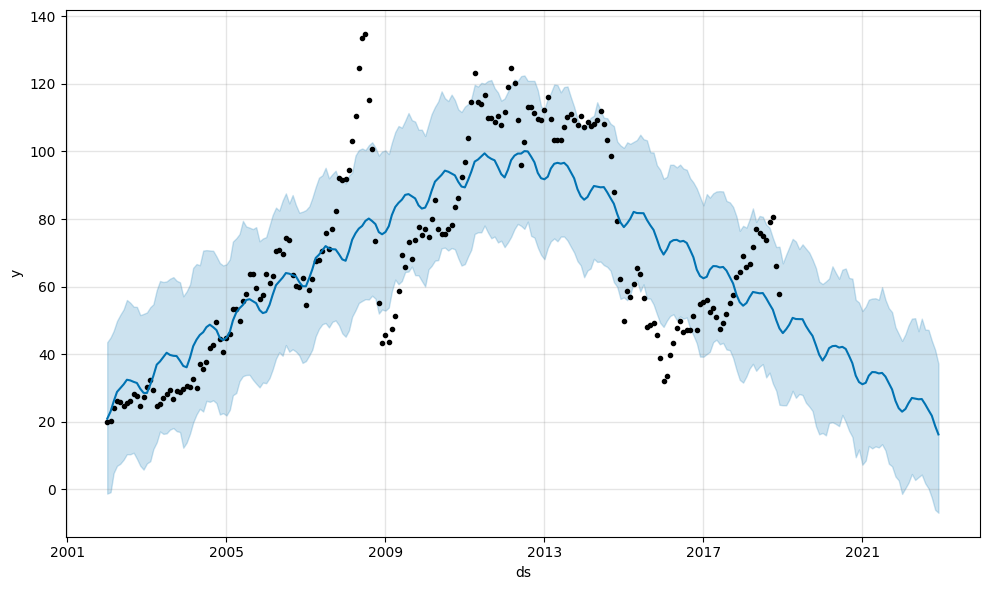

In [45]:


# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq= 'MS')

# Use the model to make predictions
forecast = model.predict(future)

# Plot the original data and the forecast
model.plot(forecast)
plt.show()


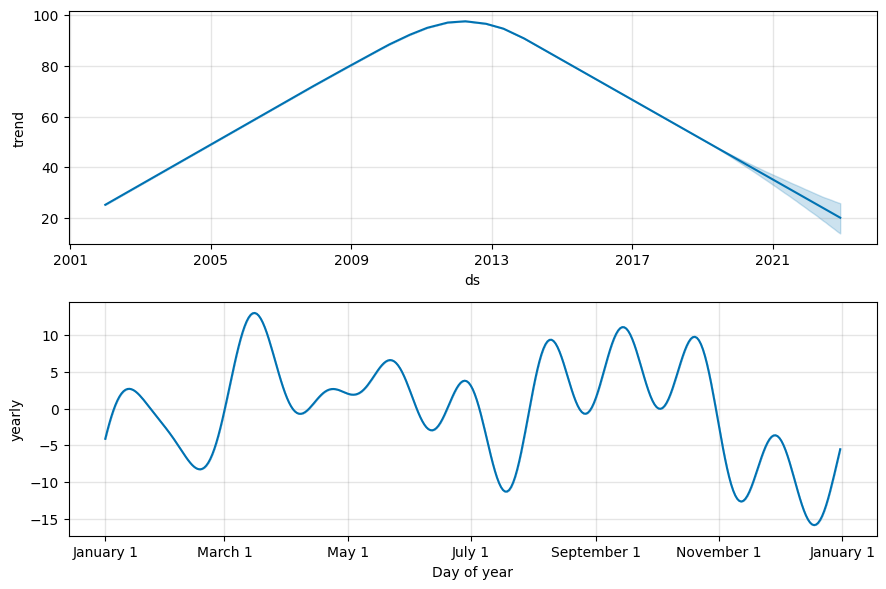

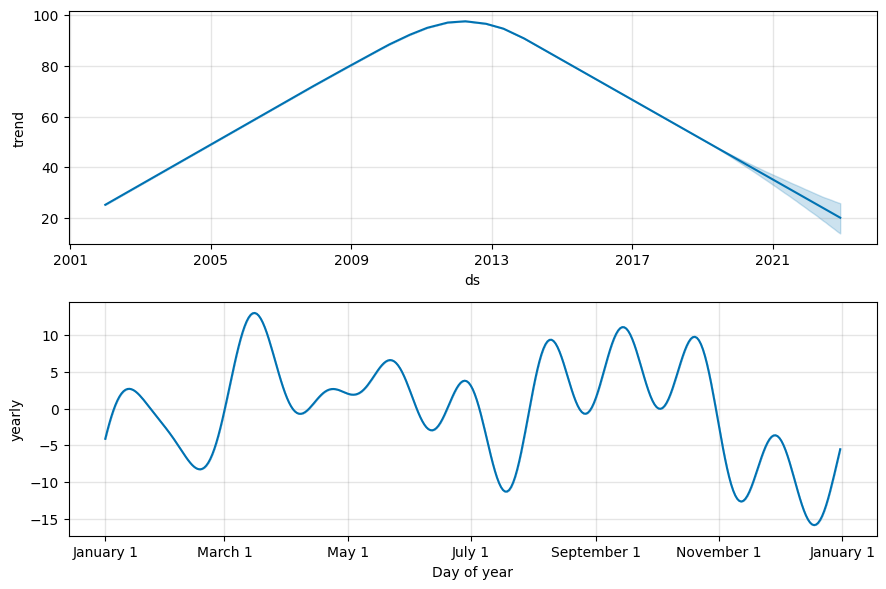

In [46]:
model.plot_components(forecast)

In [47]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data['y'], forecast[['yhat']])
print('MAE: %.3f' % mae)

MAE: 18.138


In [49]:
mean_absolute_percentage_error(data['y'], forecast[['yhat']])

0.2698813367806789